In [1068]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE

In [971]:
df = pd.read_csv("total_players_data.csv")

In [972]:
df.columns

Index(['Unnamed: 0', 'player_id', 'season', 'team_id', 'market_value',
       'player_name', 'birthdate', 'height', 'main_position', 'national_team',
       'foot', 'age', 'agent_name', 'assists', 'yellow_cards', 'red_cards',
       'injury', 'player_app', 'goals', 'own_goals'],
      dtype='object')

In [1083]:
df

,market_value,height,main_position,national_team,foot,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,Age
0,35000000.0,200.0,0,0,0,0,0.0,1.0,2.0,18.0,26.0,0.0,0.0,23.0
1,12000000.0,199.0,0,1,1,0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,28.0
2,250000.0,190.0,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
3,250000.0,199.0,0,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,17000000.0,190.0,1,4,1,0,0.0,1.0,0.0,15.0,14.0,2.0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25893,1200000.0,189.0,10,20,1,0,0.0,3.0,0.0,0.0,15.0,0.0,0.0,27.0
25894,1200000.0,187.0,10,31,1,0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,26.0
25895,600000.0,185.0,10,110,1,136,1.0,1.0,0.0,0.0,15.0,1.0,0.0,24.0
25896,300000.0,174.0,10,274,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0


In [973]:
df.isna().sum()

Unnamed: 0           0
player_id            0
season               0
team_id              0
market_value      1557
player_name       4129
birthdate         4129
height            4404
main_position     4129
national_team     7624
foot              4200
age               4129
agent_name           0
assists              0
yellow_cards     16733
red_cards        16733
injury               0
player_app        8881
goals            19900
own_goals        25274
dtype: int64

In [974]:
df.drop("age", axis=1, inplace=True)

In [975]:
df

,Unnamed: 0,player_id,season,team_id,market_value,player_name,birthdate,height,main_position,national_team,foot,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals
0,0,108390,2015,631,35000000.0,Thibaut Courtois,1992-05-11,200.0,Goalkeeper,Belgium,left,Unknown,0.0,1.0,2.0,18.0,26.0,NaN,NaN
1,1,33873,2015,631,12000000.0,Asmir Begovic,1987-06-20,199.0,Goalkeeper,Bosnia,right,Unknown,0.0,NaN,NaN,0.0,22.0,NaN,NaN
2,2,16810,2015,631,250000.0,Marco Amelia,1982-04-02,190.0,Goalkeeper,Italy,right,Unknown,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,3,128898,2015,631,250000.0,Jamal Blackman,1993-10-27,199.0,Goalkeeper,England U21,right,Panthera Sports,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,4,157509,2015,631,17000000.0,Kurt Zouma,1994-10-27,190.0,Centre-Back,France,right,Unknown,0.0,1.0,0.0,15.0,14.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25893,25893,203504,2021,3524,1200000.0,Pierre Yves Hamel,1994-02-03,189.0,Centre-Forward,NaN,right,Unknown,0.0,3.0,0.0,0.0,15.0,NaN,NaN
25894,25894,321647,2021,3524,1200000.0,Grejohn Kyei,1995-08-12,187.0,Centre-Forward,France U21,right,Unknown,1.0,1.0,0.0,0.0,2.0,NaN,NaN
25895,25895,272644,2021,3524,600000.0,Jordan Tell,1997-06-10,185.0,Centre-Forward,Guadeloupe,right,Kemari,1.0,1.0,0.0,0.0,15.0,1.0,NaN
25896,25896,657635,2021,3524,300000.0,Bryan Teixeira,2000-09-01,174.0,Centre-Forward,Cape Verde,right,Unknown,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [976]:
df["birthdate"].dtype

dtype('O')

In [977]:
# convert the Birthdate column to a datetime data type
df["birthdate"] = pd.to_datetime(df["birthdate"])

# extract the birth year from the Birthdate column
df["birth Year"] = df["birthdate"].dt.year

# calculate the age of each player
df["Age"] = df["season"] - df["birth Year"]

# display the resulting DataFrame
print(df)

       Unnamed: 0  player_id  season  team_id  market_value   
0               0     108390    2015      631    35000000.0  \
1               1      33873    2015      631    12000000.0   
2               2      16810    2015      631      250000.0   
3               3     128898    2015      631      250000.0   
4               4     157509    2015      631    17000000.0   
...           ...        ...     ...      ...           ...   
25893       25893     203504    2021     3524     1200000.0   
25894       25894     321647    2021     3524     1200000.0   
25895       25895     272644    2021     3524      600000.0   
25896       25896     657635    2021     3524      300000.0   
25897       25897     969153    2021     3524      100000.0   

             player_name  birthdate  height   main_position national_team   
0       Thibaut Courtois 1992-05-11   200.0      Goalkeeper       Belgium  \
1          Asmir Begovic 1987-06-20   199.0      Goalkeeper        Bosnia   
2           

In [978]:
df

,Unnamed: 0,player_id,season,team_id,market_value,player_name,birthdate,height,main_position,national_team,...,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,birth Year,Age
0,0,108390,2015,631,35000000.0,Thibaut Courtois,1992-05-11,200.0,Goalkeeper,Belgium,...,Unknown,0.0,1.0,2.0,18.0,26.0,NaN,NaN,1992.0,23.0
1,1,33873,2015,631,12000000.0,Asmir Begovic,1987-06-20,199.0,Goalkeeper,Bosnia,...,Unknown,0.0,NaN,NaN,0.0,22.0,NaN,NaN,1987.0,28.0
2,2,16810,2015,631,250000.0,Marco Amelia,1982-04-02,190.0,Goalkeeper,Italy,...,Unknown,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1982.0,33.0
3,3,128898,2015,631,250000.0,Jamal Blackman,1993-10-27,199.0,Goalkeeper,England U21,...,Panthera Sports,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1993.0,22.0
4,4,157509,2015,631,17000000.0,Kurt Zouma,1994-10-27,190.0,Centre-Back,France,...,Unknown,0.0,1.0,0.0,15.0,14.0,2.0,NaN,1994.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25893,25893,203504,2021,3524,1200000.0,Pierre Yves Hamel,1994-02-03,189.0,Centre-Forward,NaN,...,Unknown,0.0,3.0,0.0,0.0,15.0,NaN,NaN,1994.0,27.0
25894,25894,321647,2021,3524,1200000.0,Grejohn Kyei,1995-08-12,187.0,Centre-Forward,France U21,...,Unknown,1.0,1.0,0.0,0.0,2.0,NaN,NaN,1995.0,26.0
25895,25895,272644,2021,3524,600000.0,Jordan Tell,1997-06-10,185.0,Centre-Forward,Guadeloupe,...,Kemari,1.0,1.0,0.0,0.0,15.0,1.0,NaN,1997.0,24.0
25896,25896,657635,2021,3524,300000.0,Bryan Teixeira,2000-09-01,174.0,Centre-Forward,Cape Verde,...,Unknown,0.0,NaN,NaN,0.0,0.0,NaN,NaN,2000.0,21.0


In [979]:
n_nan_age = df["Age"].isna().sum()
n_nan_age

4129

In [980]:
n_nan_birthdate = df["birthdate"].isna().sum()
n_nan_birthdate

4129

In [981]:
nan_rows_birthdate = df[df["birthdate"].isna()]
nan_rows_birthdate

,Unnamed: 0,player_id,season,team_id,market_value,player_name,birthdate,height,main_position,national_team,...,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,birth Year,Age
323,323,183281,2015,379,250000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4886,4886,697282,2021,11,NaN,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5200,5200,661208,2021,399,800000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5201,5201,746067,2021,399,NaN,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5205,5205,614082,2021,399,500000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25611,25611,773795,2021,995,400000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
25615,25615,548650,2021,995,3000000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
25755,25755,807688,2021,1420,100000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
25822,25822,730126,2021,1095,400000.0,NaN,NaT,NaN,NaN,NaN,...,ProStar,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [982]:
df[df["main_position"].isna()]

,Unnamed: 0,player_id,season,team_id,market_value,player_name,birthdate,height,main_position,national_team,...,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,birth Year,Age
323,323,183281,2015,379,250000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4886,4886,697282,2021,11,NaN,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5200,5200,661208,2021,399,800000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5201,5201,746067,2021,399,NaN,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5205,5205,614082,2021,399,500000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25611,25611,773795,2021,995,400000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
25615,25615,548650,2021,995,3000000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
25755,25755,807688,2021,1420,100000.0,NaN,NaT,NaN,NaN,NaN,...,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
25822,25822,730126,2021,1095,400000.0,NaN,NaT,NaN,NaN,NaN,...,ProStar,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [983]:
# fill the NaN values of column "Age" with the median
median = df["Age"].median()
df["Age"].fillna(median, inplace=True)
df

,Unnamed: 0,player_id,season,team_id,market_value,player_name,birthdate,height,main_position,national_team,...,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,birth Year,Age
0,0,108390,2015,631,35000000.0,Thibaut Courtois,1992-05-11,200.0,Goalkeeper,Belgium,...,Unknown,0.0,1.0,2.0,18.0,26.0,NaN,NaN,1992.0,23.0
1,1,33873,2015,631,12000000.0,Asmir Begovic,1987-06-20,199.0,Goalkeeper,Bosnia,...,Unknown,0.0,NaN,NaN,0.0,22.0,NaN,NaN,1987.0,28.0
2,2,16810,2015,631,250000.0,Marco Amelia,1982-04-02,190.0,Goalkeeper,Italy,...,Unknown,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1982.0,33.0
3,3,128898,2015,631,250000.0,Jamal Blackman,1993-10-27,199.0,Goalkeeper,England U21,...,Panthera Sports,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1993.0,22.0
4,4,157509,2015,631,17000000.0,Kurt Zouma,1994-10-27,190.0,Centre-Back,France,...,Unknown,0.0,1.0,0.0,15.0,14.0,2.0,NaN,1994.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25893,25893,203504,2021,3524,1200000.0,Pierre Yves Hamel,1994-02-03,189.0,Centre-Forward,NaN,...,Unknown,0.0,3.0,0.0,0.0,15.0,NaN,NaN,1994.0,27.0
25894,25894,321647,2021,3524,1200000.0,Grejohn Kyei,1995-08-12,187.0,Centre-Forward,France U21,...,Unknown,1.0,1.0,0.0,0.0,2.0,NaN,NaN,1995.0,26.0
25895,25895,272644,2021,3524,600000.0,Jordan Tell,1997-06-10,185.0,Centre-Forward,Guadeloupe,...,Kemari,1.0,1.0,0.0,0.0,15.0,1.0,NaN,1997.0,24.0
25896,25896,657635,2021,3524,300000.0,Bryan Teixeira,2000-09-01,174.0,Centre-Forward,Cape Verde,...,Unknown,0.0,NaN,NaN,0.0,0.0,NaN,NaN,2000.0,21.0


In [984]:
n_nan_age2 = df["Age"].isna().sum()
n_nan_age2

0

In [985]:
n_nan_agent_name = df["agent_name"].isna().sum()
n_nan_agent_name

0

In [986]:
df.columns

Index(['Unnamed: 0', 'player_id', 'season', 'team_id', 'market_value',
       'player_name', 'birthdate', 'height', 'main_position', 'national_team',
       'foot', 'agent_name', 'assists', 'yellow_cards', 'red_cards', 'injury',
       'player_app', 'goals', 'own_goals', 'birth Year', 'Age'],
      dtype='object')

In [987]:
n_nan_agent_name = df["agent_name"].isna().sum()
n_nan_agent_name

0

In [988]:
n_nan_national_team = df["national_team"].isna().sum()
n_nan_national_team

7624

In [989]:
# fill the NaN values of column "national_team" with Unknown
df["national_team"].fillna("Unknown", inplace=True)
df

,Unnamed: 0,player_id,season,team_id,market_value,player_name,birthdate,height,main_position,national_team,...,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,birth Year,Age
0,0,108390,2015,631,35000000.0,Thibaut Courtois,1992-05-11,200.0,Goalkeeper,Belgium,...,Unknown,0.0,1.0,2.0,18.0,26.0,NaN,NaN,1992.0,23.0
1,1,33873,2015,631,12000000.0,Asmir Begovic,1987-06-20,199.0,Goalkeeper,Bosnia,...,Unknown,0.0,NaN,NaN,0.0,22.0,NaN,NaN,1987.0,28.0
2,2,16810,2015,631,250000.0,Marco Amelia,1982-04-02,190.0,Goalkeeper,Italy,...,Unknown,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1982.0,33.0
3,3,128898,2015,631,250000.0,Jamal Blackman,1993-10-27,199.0,Goalkeeper,England U21,...,Panthera Sports,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1993.0,22.0
4,4,157509,2015,631,17000000.0,Kurt Zouma,1994-10-27,190.0,Centre-Back,France,...,Unknown,0.0,1.0,0.0,15.0,14.0,2.0,NaN,1994.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25893,25893,203504,2021,3524,1200000.0,Pierre Yves Hamel,1994-02-03,189.0,Centre-Forward,Unknown,...,Unknown,0.0,3.0,0.0,0.0,15.0,NaN,NaN,1994.0,27.0
25894,25894,321647,2021,3524,1200000.0,Grejohn Kyei,1995-08-12,187.0,Centre-Forward,France U21,...,Unknown,1.0,1.0,0.0,0.0,2.0,NaN,NaN,1995.0,26.0
25895,25895,272644,2021,3524,600000.0,Jordan Tell,1997-06-10,185.0,Centre-Forward,Guadeloupe,...,Kemari,1.0,1.0,0.0,0.0,15.0,1.0,NaN,1997.0,24.0
25896,25896,657635,2021,3524,300000.0,Bryan Teixeira,2000-09-01,174.0,Centre-Forward,Cape Verde,...,Unknown,0.0,NaN,NaN,0.0,0.0,NaN,NaN,2000.0,21.0


In [990]:
n_nan_national_team2 = df["national_team"].isna().sum()
n_nan_national_team2

0

In [991]:
n_nan_goals = df["goals"].isna().sum()
n_nan_goals

19900

In [992]:
# fill the NaN values of column "goals" with 0
df["goals"].fillna(0, inplace=True)

In [993]:
n_nan_goals2 = df["goals"].isna().sum()
n_nan_goals2

0

In [994]:
df["assists"].unique()

array([ 0.,  1.,  2.,  4.,  3.,  8.,  5., 10.,  6.,  7.,  9., 12., 19.,
       11., 15., 13., 20., 14., 17., 22., 18., 16., 21., 23., 24.])

In [995]:
n_nan_goals2 = df["goals"].isna().sum()
n_nan_goals2

0

In [996]:
df[df["assists"] == 21.0]

,Unnamed: 0,player_id,season,team_id,market_value,player_name,birthdate,height,main_position,national_team,...,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,birth Year,Age
5482,5482,68290,2015,131,100000000.0,Neymar,1992-02-05,175.0,Left Winger,Brazil,...,Unknown,21.0,8.0,0.0,1.0,22.0,25.0,NaN,1992.0,23.0
5488,5488,44352,2015,131,90000000.0,Luis Suarez,1987-01-24,182.0,Centre-Forward,Uruguay,...,Unknown,21.0,8.0,0.0,1.0,21.0,48.0,NaN,1987.0,28.0
20877,20877,45320,2015,583,60000000.0,Angel Di Maria,1988-02-14,180.0,Right Winger,Argentina,...,DCGLOBALSL,21.0,NaN,NaN,3.0,39.0,13.0,NaN,1988.0,27.0


In [997]:
n_nan_assists = df["assists"].isna().sum()
n_nan_assists

0

In [998]:
df.columns

Index(['Unnamed: 0', 'player_id', 'season', 'team_id', 'market_value',
       'player_name', 'birthdate', 'height', 'main_position', 'national_team',
       'foot', 'agent_name', 'assists', 'yellow_cards', 'red_cards', 'injury',
       'player_app', 'goals', 'own_goals', 'birth Year', 'Age'],
      dtype='object')

In [999]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [1000]:
df.drop("birthdate", axis=1, inplace=True)

In [1001]:
df.drop("birth Year", axis=1, inplace=True)

In [1002]:
df["main_position"].fillna("Unknown", inplace=True)

In [1003]:
df.columns

Index(['player_id', 'season', 'team_id', 'market_value', 'player_name',
       'height', 'main_position', 'national_team', 'foot', 'agent_name',
       'assists', 'yellow_cards', 'red_cards', 'injury', 'player_app', 'goals',
       'own_goals', 'Age'],
      dtype='object')

In [1004]:
df.isna().sum()

player_id            0
season               0
team_id              0
market_value      1557
player_name       4129
height            4404
main_position        0
national_team        0
foot              4200
agent_name           0
assists              0
yellow_cards     16733
red_cards        16733
injury               0
player_app        8881
goals                0
own_goals        25274
Age                  0
dtype: int64

In [1005]:
df[df["player_name"].isna()]

,player_id,season,team_id,market_value,player_name,height,main_position,national_team,foot,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,Age
323,183281,2015,379,250000.0,NaN,NaN,Unknown,Unknown,NaN,Unknown,0.0,NaN,NaN,0.0,NaN,0.0,NaN,25.0
4886,697282,2021,11,NaN,NaN,NaN,Unknown,Unknown,NaN,Unknown,0.0,NaN,NaN,0.0,NaN,0.0,NaN,25.0
5200,661208,2021,399,800000.0,NaN,NaN,Unknown,Unknown,NaN,Unknown,0.0,NaN,NaN,0.0,NaN,0.0,NaN,25.0
5201,746067,2021,399,NaN,NaN,NaN,Unknown,Unknown,NaN,Unknown,0.0,NaN,NaN,0.0,NaN,0.0,NaN,25.0
5205,614082,2021,399,500000.0,NaN,NaN,Unknown,Unknown,NaN,Unknown,0.0,NaN,NaN,0.0,NaN,0.0,NaN,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25611,773795,2021,995,400000.0,NaN,NaN,Unknown,Unknown,NaN,Unknown,0.0,NaN,NaN,0.0,NaN,0.0,NaN,25.0
25615,548650,2021,995,3000000.0,NaN,NaN,Unknown,Unknown,NaN,Unknown,0.0,NaN,NaN,0.0,NaN,0.0,NaN,25.0
25755,807688,2021,1420,100000.0,NaN,NaN,Unknown,Unknown,NaN,Unknown,0.0,NaN,NaN,0.0,NaN,0.0,NaN,25.0
25822,730126,2021,1095,400000.0,NaN,NaN,Unknown,Unknown,NaN,ProStar,0.0,NaN,NaN,0.0,NaN,0.0,NaN,25.0


In [1006]:
df[df["market_value"].isna()].isna().sum()

player_id           0
season              0
team_id             0
market_value     1557
player_name       317
height            432
main_position       0
national_team       0
foot              320
agent_name          0
assists             0
yellow_cards     1523
red_cards        1523
injury              0
player_app        554
goals               0
own_goals        1556
Age                 0
dtype: int64

In [1007]:
df.drop("player_name", axis=1, inplace=True)

In [1008]:
df.drop("player_id", axis=1, inplace=True)

In [1009]:
df["foot"].fillna("Unknown", inplace=True)

In [1010]:
median = df["height"].median()
df["height"].fillna(median, inplace=True)

In [1011]:
df["player_app"].unique()

array([26., 22.,  0., 14., 30., 19., 28., nan,  2.,  1., 38., 34., 37.,
       29., 44., 17., 35., 21., 39., 43., 16., 70., 12., 10., 47.,  5.,
       42.,  4., 24., 15., 45., 74., 32., 13., 41., 31.,  7., 40., 25.,
       20., 27., 36.,  3., 23.,  9., 11., 53., 68.,  8., 33.,  6., 58.,
       18., 46., 49., 52., 56., 50., 54., 66., 55., 51., 48., 69., 73.,
       64., 59., 65., 62., 72., 78., 84., 76., 60.])

In [1012]:
df["player_app"].fillna(0, inplace=True)

In [1013]:
df["own_goals"].unique()

array([nan,  1.,  2.,  3.])

In [1014]:
df["own_goals"].fillna(0, inplace=True)

In [1015]:
df["yellow_cards"].fillna(0, inplace=True)
df["red_cards"].fillna(0, inplace=True)

In [1016]:
df.drop("season", axis=1, inplace=True)
df.drop("team_id", axis=1, inplace=True)

In [1017]:
df.isna().sum()

market_value     1557
height              0
main_position       0
national_team       0
foot                0
agent_name          0
assists             0
yellow_cards        0
red_cards           0
injury              0
player_app          0
goals               0
own_goals           0
Age                 0
dtype: int64

In [1018]:
df

,market_value,height,main_position,national_team,foot,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,Age
0,35000000.0,200.0,Goalkeeper,Belgium,left,Unknown,0.0,1.0,2.0,18.0,26.0,0.0,0.0,23.0
1,12000000.0,199.0,Goalkeeper,Bosnia,right,Unknown,0.0,0.0,0.0,0.0,22.0,0.0,0.0,28.0
2,250000.0,190.0,Goalkeeper,Italy,right,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
3,250000.0,199.0,Goalkeeper,England U21,right,Panthera Sports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,17000000.0,190.0,Centre-Back,France,right,Unknown,0.0,1.0,0.0,15.0,14.0,2.0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25893,1200000.0,189.0,Centre-Forward,Unknown,right,Unknown,0.0,3.0,0.0,0.0,15.0,0.0,0.0,27.0
25894,1200000.0,187.0,Centre-Forward,France U21,right,Unknown,1.0,1.0,0.0,0.0,2.0,0.0,0.0,26.0
25895,600000.0,185.0,Centre-Forward,Guadeloupe,right,Kemari,1.0,1.0,0.0,0.0,15.0,1.0,0.0,24.0
25896,300000.0,174.0,Centre-Forward,Cape Verde,right,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0


In [1019]:
df.dtypes

market_value     float64
height           float64
main_position     object
national_team     object
foot              object
agent_name        object
assists          float64
yellow_cards     float64
red_cards        float64
injury           float64
player_app       float64
goals            float64
own_goals        float64
Age              float64
dtype: object

In [1020]:
df["main_position"].unique()

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Right Midfield',
       'Attacking Midfield', 'Left Winger', 'Right Winger',
       'Centre-Forward', 'midfield', 'Left Midfield', 'Second Striker',
       'Unknown', 'Defender', 'Attack'], dtype=object)

In [1021]:
len(df["national_team"].unique())

299

In [1022]:
df["foot"].unique()

array(['left', 'right', 'both', 'Unknown', '\xa0'], dtype=object)

In [1023]:
foo_rows = df[df["agent_name"].str.contains("\xa0")]
foo_rows

,market_value,height,main_position,national_team,foot,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,Age


In [1024]:
df["foot"] = df["foot"].replace("\xa0", "right")

In [1025]:
df["foot"].unique()

array(['left', 'right', 'both', 'Unknown'], dtype=object)

In [1026]:
len(df["agent_name"].unique())

254

In [1027]:
def create_dict(lst):
    return {value: index for index, value in enumerate(lst)}

In [1028]:
create_dict(df["main_position"].unique())

{'Goalkeeper': 0,
 'Centre-Back': 1,
 'Left-Back': 2,
 'Right-Back': 3,
 'Defensive Midfield': 4,
 'Central Midfield': 5,
 'Right Midfield': 6,
 'Attacking Midfield': 7,
 'Left Winger': 8,
 'Right Winger': 9,
 'Centre-Forward': 10,
 'midfield': 11,
 'Left Midfield': 12,
 'Second Striker': 13,
 'Unknown': 14,
 'Defender': 15,
 'Attack': 16}

In [1029]:
df["main_position"] = df["main_position"].map(create_dict(df["main_position"].unique()))
df["national_team"] = df["national_team"].map(create_dict(df["national_team"].unique()))
df["agent_name"] = df["agent_name"].map(create_dict(df["agent_name"].unique()))
df["foot"] = df["foot"].map(create_dict(df["foot"].unique()))
df

,market_value,height,main_position,national_team,foot,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,Age
0,35000000.0,200.0,0,0,0,0,0.0,1.0,2.0,18.0,26.0,0.0,0.0,23.0
1,12000000.0,199.0,0,1,1,0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,28.0
2,250000.0,190.0,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
3,250000.0,199.0,0,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,17000000.0,190.0,1,4,1,0,0.0,1.0,0.0,15.0,14.0,2.0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25893,1200000.0,189.0,10,20,1,0,0.0,3.0,0.0,0.0,15.0,0.0,0.0,27.0
25894,1200000.0,187.0,10,31,1,0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,26.0
25895,600000.0,185.0,10,110,1,136,1.0,1.0,0.0,0.0,15.0,1.0,0.0,24.0
25896,300000.0,174.0,10,274,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0


In [1030]:
df_dropped = df.dropna()
df_dropped

,market_value,height,main_position,national_team,foot,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,Age
0,35000000.0,200.0,0,0,0,0,0.0,1.0,2.0,18.0,26.0,0.0,0.0,23.0
1,12000000.0,199.0,0,1,1,0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,28.0
2,250000.0,190.0,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
3,250000.0,199.0,0,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,17000000.0,190.0,1,4,1,0,0.0,1.0,0.0,15.0,14.0,2.0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25893,1200000.0,189.0,10,20,1,0,0.0,3.0,0.0,0.0,15.0,0.0,0.0,27.0
25894,1200000.0,187.0,10,31,1,0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,26.0
25895,600000.0,185.0,10,110,1,136,1.0,1.0,0.0,0.0,15.0,1.0,0.0,24.0
25896,300000.0,174.0,10,274,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0


In [1031]:
val_data = df[df["market_value"].isna()]

In [1032]:
df_dropped.isna().sum()

market_value     0
height           0
main_position    0
national_team    0
foot             0
agent_name       0
assists          0
yellow_cards     0
red_cards        0
injury           0
player_app       0
goals            0
own_goals        0
Age              0
dtype: int64

In [1033]:
y = df_dropped.iloc[:, 0]
X = df_dropped.iloc[:, 1:]

In [1034]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

In [1035]:
scaler = StandardScaler()

train_X_scaled = scaler.fit_transform(X_train)
test_X_scaled = scaler.transform(X_test)

In [1036]:
pca0 = PCA()

pca_train0 = pca0.fit_transform(train_X_scaled)

# determine the number of principal components to use based on their explained variance
explained_variances = pca0.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)
num_components = np.argmax(cumulative_variances >= 0.95) + 1

In [1037]:
explained_variances

array([0.1995705 , 0.13944939, 0.09976598, 0.0814224 , 0.0798794 ,
       0.07254736, 0.06999284, 0.06568649, 0.05875905, 0.05148454,
       0.03525661, 0.02582301, 0.02036245])

In [1038]:
cumulative_variances

array([0.1995705 , 0.33901989, 0.43878586, 0.52020826, 0.60008766,
       0.67263502, 0.74262786, 0.80831435, 0.8670734 , 0.91855793,
       0.95381454, 0.97963755, 1.        ])

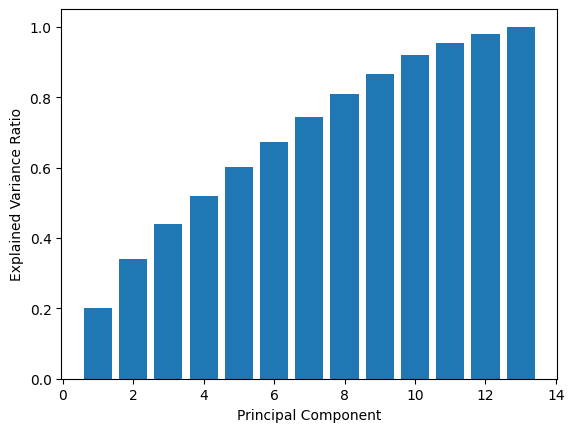

In [1039]:
plt.bar(range(1, pca0.n_components_ + 1), cumulative_variances)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [1040]:
num_components

11

In [1041]:
pca = PCA(n_components=num_components)
pca_train = pca.fit_transform(train_X_scaled)
pca_test = pca.transform(test_X_scaled)

In [1042]:
test_X_scaled.shape

(2435, 13)

In [1043]:
pca_train.shape[1]

11

In [1044]:
pca_test.shape[1]

11

In [1045]:
pca_train

array([[ 3.92611498,  1.15781282,  1.58313782, ..., -0.58146117,
         1.59787371, -0.82961347],
       [ 1.84334411,  0.9144146 ,  1.20103137, ...,  0.66796091,
        -0.05827913,  0.22728728],
       [ 0.27559979, -0.14245301, -0.41756939, ...,  0.05214145,
         0.10895087,  0.48206172],
       ...,
       [ 2.47574699, -1.20041695, -2.98418311, ..., -1.18958225,
         2.0453806 ,  1.13617009],
       [ 4.95288399, -1.17769012, -1.25429451, ..., -0.77384463,
         0.82671562,  0.84649372],
       [-0.93427065,  0.44447313,  0.3407038 , ..., -1.71782331,
         0.44483745, -0.21911881]])

In [1046]:
pca_train_df = pd.DataFrame(
    pca_train, columns=[f"PC{i}" for i in range(1, pca_train.shape[1] + 1)]
)
pca_test_df = pd.DataFrame(
    pca_test, columns=[f"PC{i}" for i in range(1, pca_test.shape[1] + 1)]
)

In [1047]:
pca_train_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,3.926115,1.157813,1.583138,-1.570993,0.294984,-1.662459,0.049058,-0.432520,-0.581461,1.597874,-0.829613
1,1.843344,0.914415,1.201031,0.141511,0.042184,-0.319873,0.182347,0.734880,0.667961,-0.058279,0.227287
2,0.275600,-0.142453,-0.417569,0.492373,-2.536452,1.787209,0.476597,-0.134637,0.052141,0.108951,0.482062
3,-0.411856,-1.021993,-1.224007,-1.375717,-1.176755,0.507260,0.119382,1.366866,1.071992,0.590477,0.108477
4,-0.020062,0.966392,-0.020766,1.302060,-0.884271,0.291942,0.128566,-0.583154,-0.846737,-0.596995,1.223212
...,...,...,...,...,...,...,...,...,...,...,...
21901,-0.882409,0.183897,-2.341768,-0.472964,-0.810125,-0.243630,-0.197442,0.504398,2.538810,-0.009324,-0.177276
21902,-0.197327,-1.215811,1.344468,2.795330,-0.858608,-0.104766,0.007336,1.598887,0.809972,0.331040,0.104875
21903,2.475747,-1.200417,-2.984183,1.649706,4.603552,3.087318,0.469489,-0.597728,-1.189582,2.045381,1.136170
21904,4.952884,-1.177690,-1.254295,0.264218,2.375879,0.727968,4.169031,-0.358989,-0.773845,0.826716,0.846494


In [1048]:
pca_test_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,3.800830,1.173028,0.566553,0.189316,-1.684808,-0.718271,0.139950,-1.343077,-0.181570,0.889824,0.743937
1,-0.762908,0.057504,1.206386,-1.077855,-0.298952,1.557207,0.471733,0.714478,0.381300,0.241214,0.192630
2,-1.431471,2.437536,-0.529532,0.354656,0.254804,-0.074300,-0.041937,-0.243216,0.132720,-0.130796,0.006100
3,-1.431471,2.437536,-0.529532,0.354656,0.254804,-0.074300,-0.041937,-0.243216,0.132720,-0.130796,0.006100
4,2.467565,-0.580675,-0.089702,-0.064124,0.181302,-1.008136,0.024909,0.218589,-0.869020,-1.480869,0.973149
...,...,...,...,...,...,...,...,...,...,...,...
2430,-1.401611,-1.179786,2.699970,-0.448232,1.247777,0.621602,0.091829,-1.559205,1.700982,-0.393600,-0.127778
2431,2.806760,3.367532,0.493344,-0.084151,-0.003156,-1.616695,-0.082271,-0.980394,0.119396,0.655086,1.962036
2432,-1.317134,2.189730,0.105724,1.957228,0.341449,-0.600241,-0.142168,1.146635,0.450709,0.078170,-0.070907
2433,-0.174413,0.785504,0.419327,-0.628620,-0.235847,0.914276,0.350888,0.579214,-0.108461,-0.259109,0.465415


In [1049]:
from sklearn.linear_model import LinearRegression

# create a linear regression object and fit the PCA-transformed training data
reg = LinearRegression()
reg.fit(pca_train, y_train)

LinearRegression()

In [1050]:
# predict on the PCA-transformed testing data and calculate R^2 score
r2_score = reg.score(pca_test, y_test)
print("R^2 score:", r2_score)

R^2 score: 0.2518916863835081


In [1052]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(pca_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [1055]:
mse = mean_squared_error(y_test, reg.predict(pca_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 117700987086899.0156


In [1056]:
r2_score = reg.score(pca_test, y_test)
print("R^2 score:", r2_score)

R^2 score: 0.32096770873458824


In [1060]:
params = {
    "n_estimators": 300,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.001,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(pca_train, y_train)

r2_score = reg.score(pca_test, y_test)
print("R^2 score:", r2_score)

R^2 score: 0.11666292900983644


In [1069]:
# Instantiation
xgb_r = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)

# Fitting the model
xgb_r.fit(pca_train, y_train)

# Predict the model
pred = xgb_r.predict(pca_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" % (rmse))

[20:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  10962904.717106


In [1070]:
from sklearn.ensemble import (
    RandomForestRegressor,
)  # create a Random Forest Regressor object with 100 trees

rf = RandomForestRegressor(n_estimators=100)

# fit the model to the training data
rf.fit(pca_train, y_train)

# make predictions on the test data
y_pred = rf.predict(pca_test)

# evaluate the model performance using mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 110612073249294.72


In [1074]:
79567213339776.81 - 110612073249294.72

-31044859909517.906

In [1071]:
from sklearn.ensemble import (
    RandomForestRegressor,
)  # create a Random Forest Regressor object with 100 trees

rf = RandomForestRegressor(n_estimators=100)

# fit the model to the training data
rf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf.predict(X_test)

# evaluate the model performance using mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 79567213339776.81


In [1073]:
from sklearn.ensemble import (
    RandomForestRegressor,
)  # create a Random Forest Regressor object with 100 trees

rf = RandomForestRegressor(n_estimators=1000)

# fit the model to the training data
rf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf.predict(X_test)

# evaluate the model performance using mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 78309853868087.53


In [1075]:
r2_score = rf.score(X_test, y_test)
print("R^2 score:", r2_score)

R^2 score: 0.548220275659644


In [1082]:
p5, p95 = np.percentile(y, [5, 95])
df_filtered = df_dropped[(y >= p5) & (y <= p95)]
df_filtered

,market_value,height,main_position,national_team,foot,agent_name,assists,yellow_cards,red_cards,injury,player_app,goals,own_goals,Age
1,12000000.0,199.0,0,1,1,0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,28.0
2,250000.0,190.0,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
3,250000.0,199.0,0,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,17000000.0,190.0,1,4,1,0,0.0,1.0,0.0,15.0,14.0,2.0,0.0,21.0
5,16000000.0,193.0,1,5,1,0,0.0,3.0,0.0,1.0,30.0,3.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25892,12000000.0,188.0,10,142,1,0,4.0,1.0,0.0,0.0,8.0,14.0,0.0,23.0
25893,1200000.0,189.0,10,20,1,0,0.0,3.0,0.0,0.0,15.0,0.0,0.0,27.0
25894,1200000.0,187.0,10,31,1,0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,26.0
25895,600000.0,185.0,10,110,1,136,1.0,1.0,0.0,0.0,15.0,1.0,0.0,24.0


In [1085]:
y = df_filtered.iloc[:, 0]
X = df_filtered.iloc[:, 1:]

In [1086]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

In [1087]:
scaler = StandardScaler()

train_X_scaled = scaler.fit_transform(X_train)
test_X_scaled = scaler.transform(X_test)

In [1088]:
from sklearn.ensemble import (
    RandomForestRegressor,
)  # create a Random Forest Regressor object with 100 trees

rf = RandomForestRegressor(n_estimators=1000)

# fit the model to the training data
rf.fit(train_X_scaled, y_train)

# make predictions on the test data
y_pred = rf.predict(test_X_scaled)

# evaluate the model performance using mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 19949795590569.65


In [1089]:
r2_score = rf.score(test_X_scaled, y_test)
print("R^2 score:", r2_score)

R^2 score: 0.4815256416287145
